In [7]:
import os
import numpy as np
import tqdm
from datetime import datetime
import pickle
from IPython.display import HTML
np.random.seed(420)

import multiprocessing
n_cores = multiprocessing.cpu_count()
print(f"num cores: {n_cores}")
from multiprocessing import Pool
from functools import partial

from HMM import unsupervised_HMM, from_hmm
from HMM_helper import (
    animate_emission,
    states_to_wordclouds,
    parse_seqs,
    parse_text,
    update_syll_map,
    sample_sentence,
    visualize_sparsities,
    rhyme_dict_gen,
    get_stats
)

num cores: 8


# Preprocessing

In [8]:
with open(os.path.join(os.getcwd(), 'data/shakespeare.txt'), 'r') as f:
    text = f.read()

with open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt'), 'r') as f:
    syll_map0 = {}
    for i, line in enumerate(f):
        line = line.strip().split()
        word = line[0] 
        # Add 10 to denote end of line syll_count
        sylls = np.array([int(s.replace('E', '1')) for s in line[1:]])
        assert(word not in syll_map0)
        syll_map0[word] = sylls

## Get maps and other relevant preprocessing data

In [9]:
by = 'line'
seqs = parse_text(text, by=by)
obs, obs_map = parse_seqs(seqs)
syll_map = update_syll_map(syll_map0, obs_map)
rhyme_d = rhyme_dict_gen(text, connected=False, with_words=False)

## Train single HMM

In [10]:
hmm = unsupervised_HMM(10, obs, 100, verbose=True)

fName = datetime.today().strftime('%y%m%d_%H%M') + f"_hmm{hmm.L}.pkl"
with open(fName, 'wb') as f:
    pickle.dump(hmm, f)

100%|██████████| 100/100 [06:42<00:00,  4.03s/it]


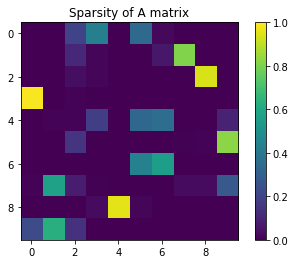

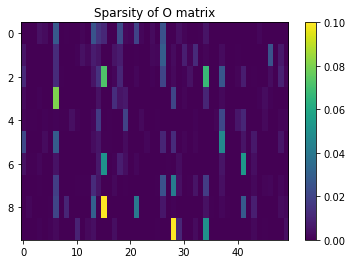

Sample Sentence:
All the babe heir life but in but doth broils and it coming the a stage i twice thou tell brow may lively no groan...



Sample Sonnet:
Admired shadows praise not controlling,
Receives thy a sour far to some my quill,
Now to first in that truth alone rolling,
My when to see o have when words i still,
More what well stars a do to then her no,
Yet prizing seen controlling remembered,
Brand or contend on were then ever so,
Thee sees light more being and end moan of dead,
But he do and but for and eyelids lend,
Double-vantage too than i created,
Thy delight thou not grow'st soul and thee tend,
With with this let to give can defeated,
Weary intents turned and offices fixed,
Are for i thy self-same made intermixed',


In [11]:
with open(fName, 'rb') as f:
    hmm = pickle.load(f)

visualize_sparsities(hmm, O_max_cols=50)
print('Sample Sentence:\n====================')
print(sample_sentence(hmm, obs_map, n_words=25))
print('\n' * 2)

shmm = from_hmm(hmm, obs_map, syll_map, rhyme_d)
print('Sample Sonnet:\n====================')
print(shmm.generate_sonnet(do_syll=True, do_rhyme=True))

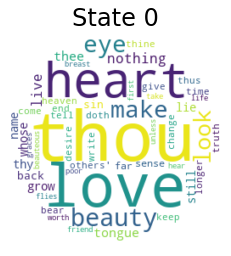

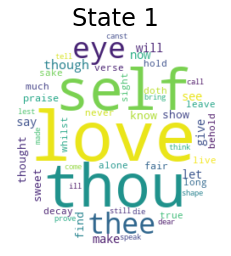

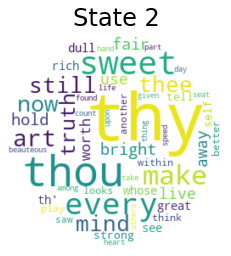

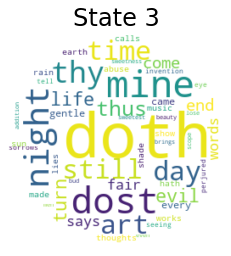

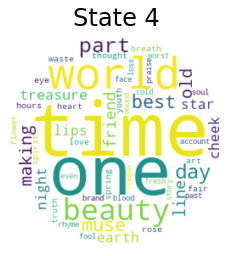

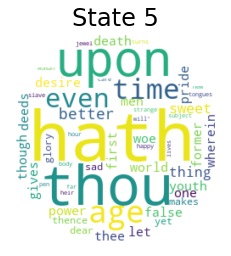

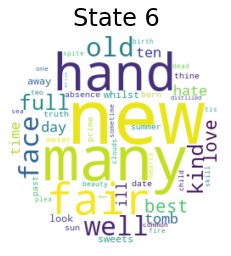

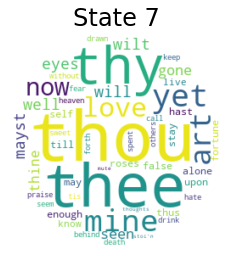

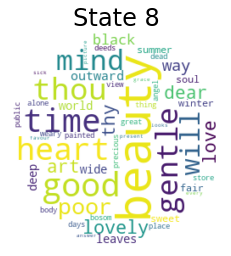

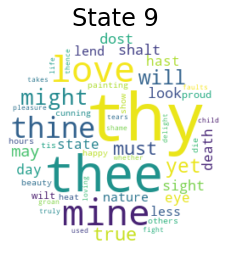

In [12]:
wordclouds = states_to_wordclouds(hmm, obs_map)

In [13]:
stats = get_stats(hmm, obs_map)

State 0
Nouns: 30.898876%
Verbs: 15.664243%
Pronouns: 11.808768%
Adjectives: 11.390174%
Adverbs: 5.342586%
Adpositions: 11.269002%
Conjunctions: 7.843137%
Determiners: 5.287508%
Cardinal Numbers: 0.264375%
Particles: 1.321877%
Other: 0.022031%
Punctuation: 0.000000%

{1: 6825, 2: 1577, 3: 297, 4: 50}
{'S': 6201, 'US': 402, 'SU': 1115, 'USU': 169, 'U': 626, 'SS': 65, 'SUSU': 19, 'SUU': 115, 'SUS': 28, 'USUU': 33}

State 1
Nouns: 23.398458%
Verbs: 34.150718%
Pronouns: 2.352472%
Adjectives: 14.500266%
Adverbs: 10.493089%
Adpositions: 11.715843%
Conjunctions: 1.289208%
Determiners: 1.707868%
Cardinal Numbers: 0.139553%
Particles: 1.129718%
Other: 0.046518%
Punctuation: 0.225944%

{1: 12333, 2: 1782, 3: 320, 4: 64}
{'S': 12219, 'SU': 937, 'USU': 108, 'SUSU': 36, 'US': 754, 'SUU': 174, 'SS': 98, 'USUU': 31, 'U': 246, 'SUS': 66, 'SSUS': 3, 'SSU': 10}

State 2
Nouns: 23.034238%
Verbs: 11.759150%
Pronouns: 8.158205%
Adjectives: 12.396694%
Adverbs: 4.262102%
Adpositions: 18.961039%
Conjunctions:


Animating...


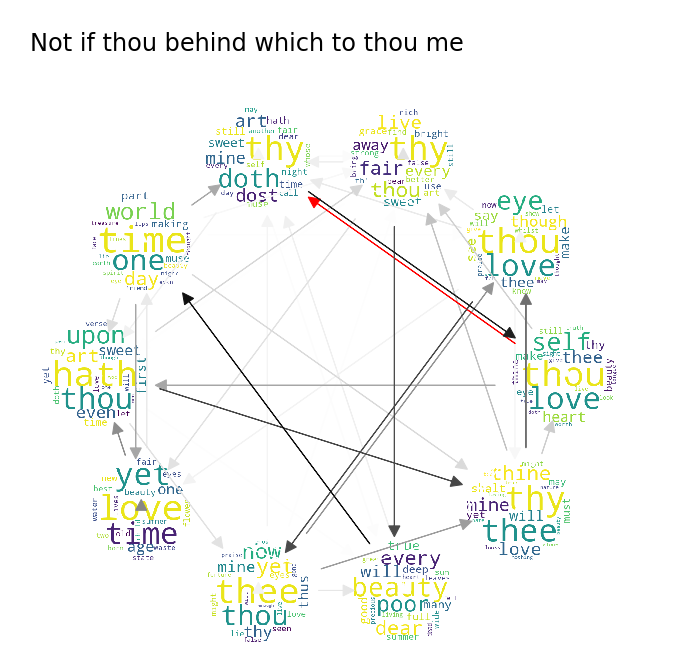

In [22]:
anim = animate_emission(hmm, obs_map, M=8)
HTML(anim.to_html5_video())

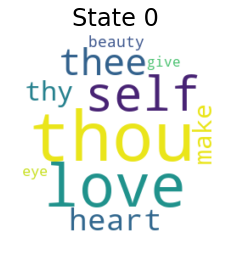

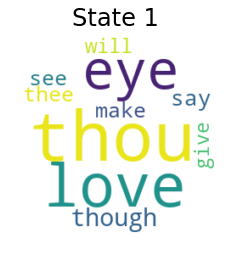

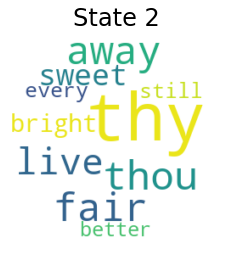

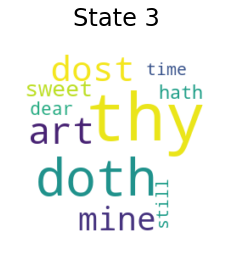

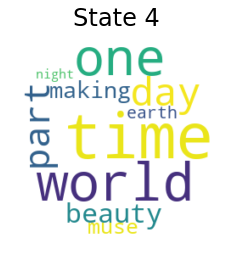

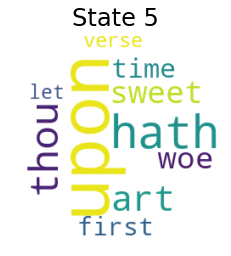

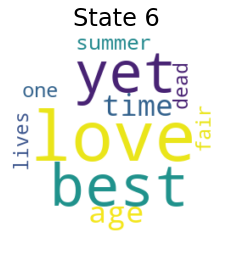

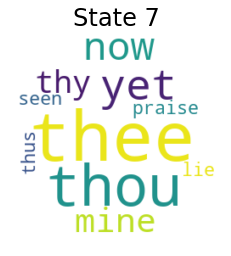

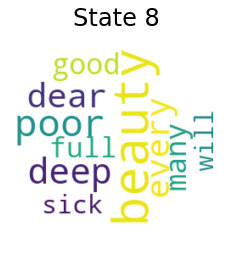

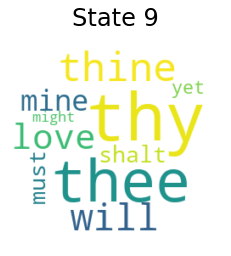

In [21]:
wordclouds = states_to_wordclouds(hmm, obs_map,max_words=10)

In [15]:
by = 'sonnet'
seqs = parse_text(text, by=by)
obs, obs_map = parse_seqs(seqs)
syll_map = update_syll_map(syll_map0, obs_map)
rhyme_d = rhyme_dict_gen(text, connected=False, with_words=False)

In [16]:
hmm = unsupervised_HMM(10, obs, 100, verbose=True)

fName = datetime.today().strftime('%y%m%d_%H%M') + f"_hmm{hmm.L}.pkl"
with open(fName, 'wb') as f:
    pickle.dump(hmm, f)

100%|██████████| 100/100 [07:04<00:00,  4.25s/it]


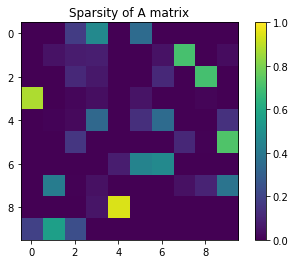

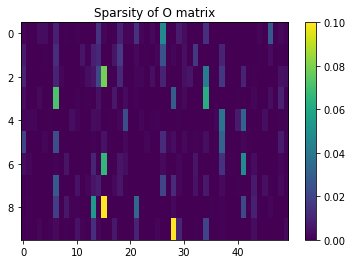

Sample Sentence:
Me in every new-found but a and waste of eye perpetual well-seeing sum my level and how against true face should enemies of to thy...



Sample Sonnet:
Am thy but a of best truth mine as thrall,
Daily more but the part accumulate,
Pace ow'st eye and brow grown gift perpetual,
Prize beauteous humble thy self and you hate,
In to to set nothing i o vile clears,
It stain for thee i i ten if this then,
Decay thee show which with come may me tears,
Other my that blunt and thou thy that men,
Scarlet lack water golden of to twain,
In love hast enforced divided doth dye,
Hold love with give am false to thou send'st gain,
Men doth which help hence my green wantonly,
With 'scaped glutton but profit ghastly weeks,
After writ every a from thy trouble cheeks,


In [17]:
with open(fName, 'rb') as f:
    hmm = pickle.load(f)

visualize_sparsities(hmm, O_max_cols=50)
print('Sample Sentence:\n====================')
print(sample_sentence(hmm, obs_map, n_words=25))
print('\n' * 2)

shmm = from_hmm(hmm, obs_map, syll_map, rhyme_d)
print('Sample Sonnet:\n====================')
print(shmm.generate_sonnet(do_syll=True, do_rhyme=True))

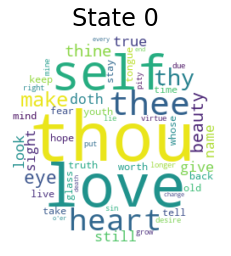

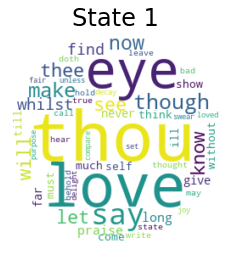

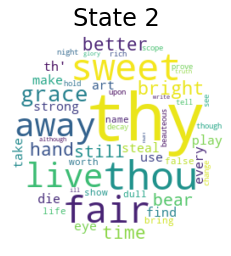

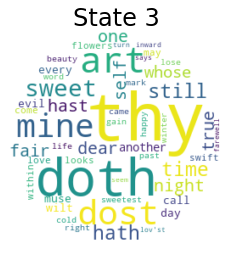

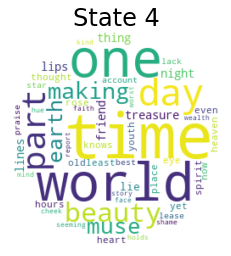

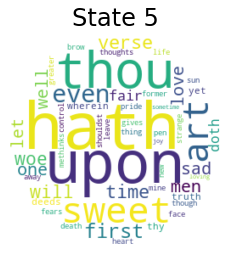

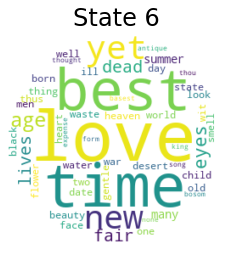

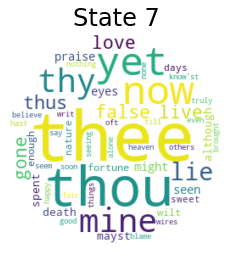

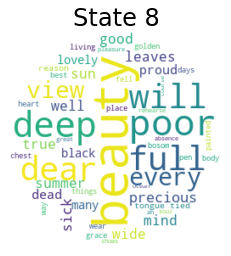

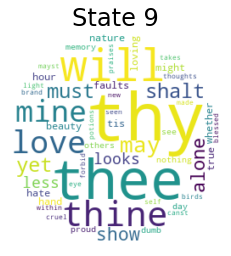

In [18]:
wordclouds = states_to_wordclouds(hmm, obs_map)


Animating...


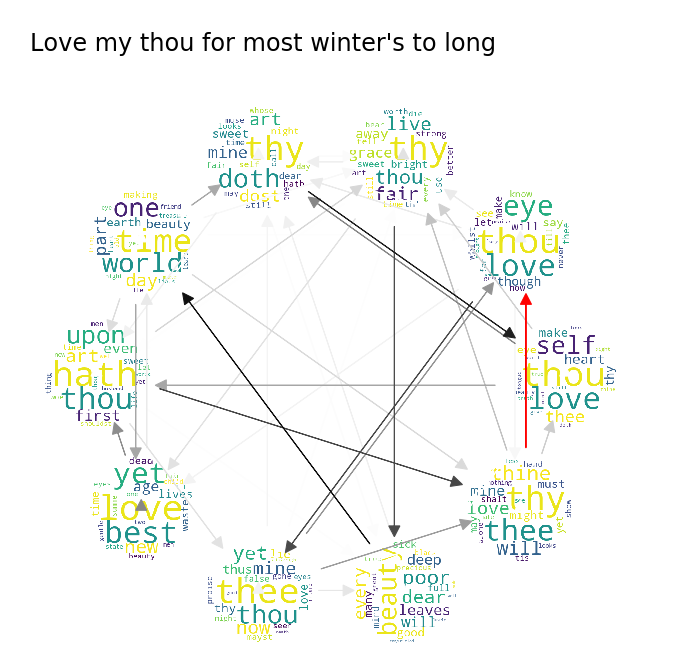

In [19]:
anim = animate_emission(hmm, obs_map, M=8)
HTML(anim.to_html5_video())

In [20]:
get_stats(hmm, obs_map)

State 0
Nouns: 37.205126%
Verbs: 17.329198%
Pronouns: 12.243898%
Adjectives: 15.043670%
Adverbs: 4.464942%
Adpositions: 8.660518%
Conjunctions: 1.795772%
Determiners: 2.914048%
Cardinal Numbers: 0.195902%
Particles: 1.665170%
Other: 0.040813%
Punctuation: 0.057138%

{1: 9337, 2: 1942, 3: 375, 4: 43}
{'S': 9066, 'US': 491, 'SU': 1432, 'SUU': 208, 'U': 315, 'USU': 151, 'SS': 67, 'SUS': 28, 'USUU': 32, 'SUSU': 17}

State 1
Nouns: 21.745424%
Verbs: 34.976586%
Pronouns: 3.320562%
Adjectives: 11.170711%
Adverbs: 10.123457%
Adpositions: 15.070243%
Conjunctions: 1.524053%
Determiners: 2.085994%
Cardinal Numbers: 0.187314%
Particles: 0.621541%
Other: 0.042571%
Punctuation: 0.212857%

{1: 9584, 3: 43, 2: 1380, 4: 34, 5: 16}
{'S': 9338, 'USU': 97, 'SU': 820, 'US': 565, 'SUU': 145, 'SUSU': 17, 'U': 332, 'SUS': 39, 'SS': 30, 'SSUS': 4, 'USUSU': 16, 'USUU': 15, 'USUS': 4, 'SSU': 4}

State 2
Nouns: 26.031573%
Verbs: 13.010343%
Pronouns: 4.964616%
Adjectives: 13.979314%
Adverbs: 3.886772%
Adpositions: